In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import os

df = pd.read_csv('Data/Student_Mental_health.csv')

In [2]:
# Data is retrieved from https://www.kaggle.com/datasets/shariful07/student-mental-health
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df.shape

(101, 11)

In [4]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [5]:
df.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Seek_treatment']

In [6]:
# Preprocess data
def clean_data(data):
    data.Age.fillna(data.Age.mean(), inplace=True)
    data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
    data['Year'].replace({'year 1':1, 'year 2':2, 'Year 1':1, 'year 3':3, 'year 4':4, 'Year 2':2, 'Year 3':3}, inplace = True)
    data['Marital_Status'].replace({'No':"Unmarried", 'Yes':"Married"}, inplace = True)
    data.head()
    return data

df = clean_data(df)
print(df.isnull().sum())

Timestamp         0
Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Seek_treatment    0
dtype: int64


In [7]:
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Seek_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,Unmarried,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,Unmarried,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,Unmarried,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Married,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,Unmarried,No,No,No,No


In [8]:
df.describe()

,Age,Year
count,101.000000,101.000000
mean,20.530000,1.970297
std,2.483767,0.994540
min,18.000000,1.000000
25%,18.000000,1.000000
50%,19.000000,2.000000
75%,23.000000,3.000000
max,24.000000,4.000000


In [9]:
# Transform the data so that it is trainable

X = df[['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status']]
X['Gender'].replace({'Female':0, "Male":1}, inplace = True)
X['Marital_Status'].replace({'Unmarried':0, 'Married':1}, inplace = True)

one_hot_course = pd.get_dummies(df['Course'])
X = pd.concat([X, one_hot_course], axis=1)

one_hot_cgpa = pd.get_dummies(df['CGPA'])
X = pd.concat([X, one_hot_cgpa], axis=1)

X.drop(columns = ['Course', 'CGPA'], inplace = True)

Y_depression = df['Depression'].replace({'No':0, 'Yes':1})
Y_anxiety = df['Anxiety'].replace({'No':0, 'Yes':1})
Y_panic_attack = df['Panic_Attack'].replace({'No':0, 'Yes':1})

Y = [Y_depression, Y_anxiety, Y_panic_attack]
Y_category = ['Depression', 'Anxiety', 'Panic_Attack']

print(f"Predict mental disorder({Y_category}) using the following attributes \n         'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Course' and 'CGPA'")

Predict mental disorder(['Depression', 'Anxiety', 'Panic_Attack']) using the following attributes 
         'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Course' and 'CGPA'


/var/folders/ty/y4xvm4r16qg653znp8pq00bw0000gn/T/ipykernel_33244/1677399729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'].replace({'Female':0, "Male":1}, inplace = True)
/var/folders/ty/y4xvm4r16qg653znp8pq00bw0000gn/T/ipykernel_33244/1677399729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Marital_Status'].replace({'Unmarried':0, 'Married':1}, inplace = True)


f1-score of models for predicting each mental health disorder
            ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'XGBoost', 'Multi-Layer Perceptron']
Depression: [0.8328912466843501, 0.5050505050505051, 0.3571428571428572, 0.7407407407407407, 0.6111111111111112]
Anxiety: [0.5714285714285715, 0.4324324324324324, 0.25882352941176473, 0.637037037037037, 0.5714285714285714]
Panic_Attack: [0.505050505050505, 0.41666666666666663, 0.2932692307692307, 0.4750000000000001, 0.60625]


Best model for Depression: Logistic Regression with f1 score of 0.8328912466843501
Best model for Anxiety: XGBoost with f1 score of 0.637037037037037
Best model for Panic_Attack: Multi-Layer Perceptron with f1 score of 0.60625


Fl-score: 0.8328912466843501


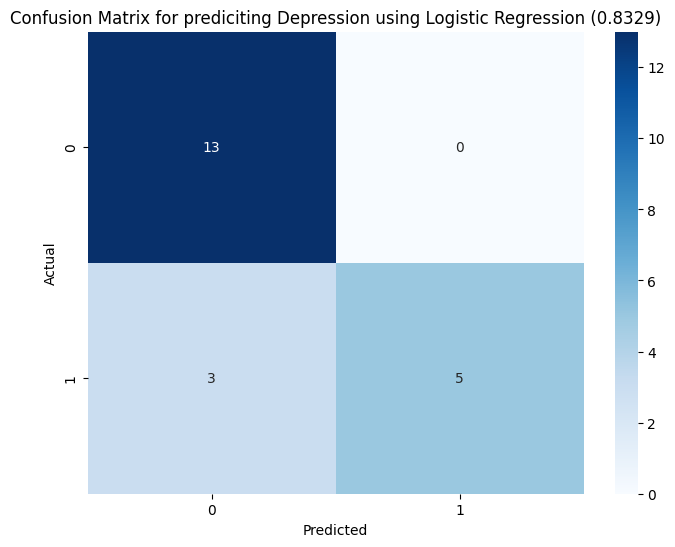

Fl-score: 0.637037037037037


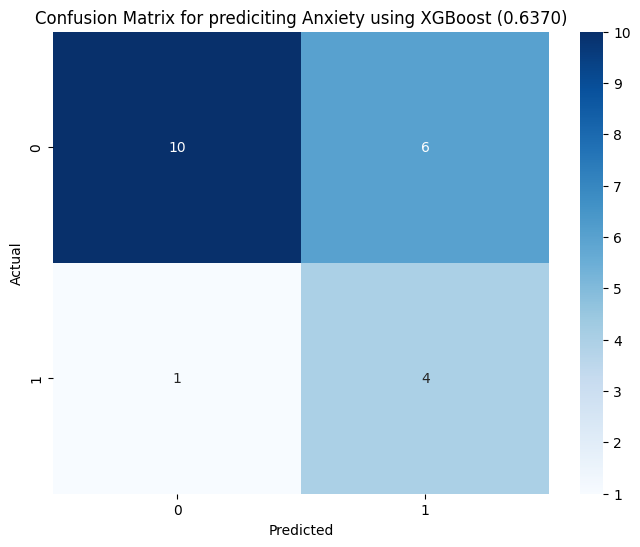

Fl-score: 0.60625


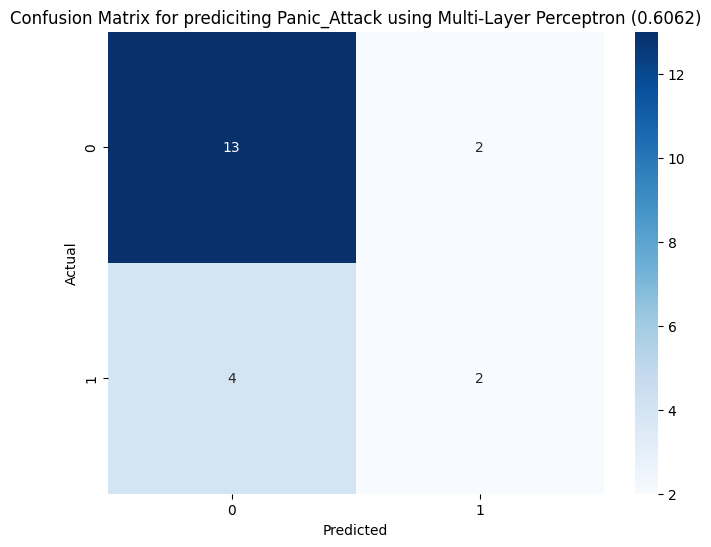

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import seaborn as sns

# Train 3 models to predict each mental health disorder seperately 
# As a respondent may suffer from more than a disease at the same time
models = [LogisticRegression(max_iter=200, ), RandomForestClassifier(max_depth=2, random_state=0), GaussianNB(), xgb.XGBClassifier(), MLPClassifier(random_state=0, max_iter=1000, hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001)]
model_name = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'XGBoost', 'Multi-Layer Perceptron']
confusion_matricies = [] # Store confusion matricies
f1_scores = []

# Perform train-test split
for i in range(3):
    scores = []
    temp_confusion_matricies = []
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y[i], test_size=0.2, random_state=42)
    
    for model in models:
    # Train the logistic regression model
        model.fit(X_train, Y_train)

    # Make predictions on the test set
        Y_pred = model.predict(X_test)

    # Create confusion matrix
        cm = confusion_matrix(Y_test, Y_pred)
        temp_confusion_matricies.append(cm)
        scores.append(f1_score(Y_test, Y_pred, average='macro'))

    f1_scores.append(scores)
    confusion_matricies.append(temp_confusion_matricies)
print("f1-score of models for predicting each mental health disorder")
print(f"            {model_name}")
for i in range(3):
    print(f"{Y_category[i]}: {f1_scores[i]}")
print('\n')
for i in range(3):
    print(f"Best model for {Y_category[i]}: {model_name[np.argmax(f1_scores[i])]} with f1 score of {f1_scores[i][np.argmax(f1_scores[i])]}")
print('\n')
for i in range(3):
    best_index = f1_scores[i].index(max(f1_scores[i])) # Get the index of the best model

    print(f"Fl-score: {f1_scores[i][best_index]}")
    cm = confusion_matricies[i][best_index]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for prediciting {Y_category[i]} using {model_name[best_index]} ({f1_scores[i][best_index]:.4f})')
    plt.show()
